### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4


### Дисциплина: Методы машинного обучения

## Москва 2022
***

### Вариант № 24

Для закрепленного за Вами варианта лабораторной работы:

1.	Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса.
2.	Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.
3.	Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек. 
4.	Разбейте набор данных из двух признаков и меток класса на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите ее на обучающей выборке. Оцените качество бинарной классификации при помощи матрицы ошибок для тестовой выборки.
5.	Визуализируйте границы принятия решений построенной нейронной сетью на обучающей и тестовой выборках.
6.	Визуализируйте ROC-кривую для построенного классификатора и вычислите площадь под ROC-кривой методом трапеций или иным методом.
7.	Обучите на полном наборе данных нейронную сеть с одним слоем и одним выходным нейроном с функцией активации сигмоида и определите дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и являющийся важным по абсолютному значению веса в обученной нейронной сети. 
8.	Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.
9.	Разбейте полный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для многоклассовой классификации и обучите ее на обучающей выборке.
10.	Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

# 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
df = tfds.as_dataframe(tfds.load("penguins", split='train'))
for i in range(4):
    df['V'+str(i)] = df['features'].apply([lambda x:x[i]])
df.drop(columns=['features'],inplace=True)
df.sample(5)

,species,V0,V1,V2,V3
224,0,0.210909,0.654762,0.000000,0.125000
25,0,0.250909,0.476190,0.322034,0.097222
40,1,0.680000,0.642857,0.491525,0.486111
289,2,0.407273,0.107143,0.610169,0.520833
15,0,0.050909,0.702381,0.305085,0.250000


In [4]:
data=df[['V1', 'V2']].values
target=df['species'].astype(int)

# 2

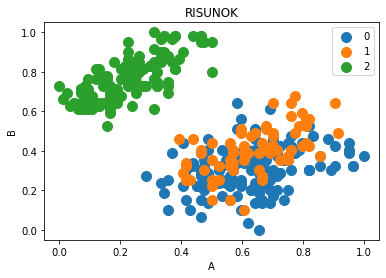

In [5]:
fig = plt.figure()
ax = plt.axes()
for i in (np.unique(target)):
    row_ix = np.where(target == i)
    ax.scatter(data[row_ix, 0], data[row_ix, 1], s=100,label=i )
plt.title('RISUNOK')
plt.xlabel('A')
plt.ylabel('B')
plt.legend()
plt.show()

# 3 

In [6]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
target.value_counts()

0    146
2    120
1     68
Name: species, dtype: int64

In [7]:
target= target.apply(lambda x:0 if x==0 else 1)
target.value_counts()

1    188
0    146
Name: species, dtype: int64

# 4

In [8]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """возвращает X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "Размер X должен быть равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "Неверное значение test_ratio"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(
    data, target, 
    test_ratio=0.2, seed=42)
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(data.shape[1],)) 
feature_normalizer.adapt(X_train)
from sklearn import metrics
model = tf.keras.Sequential([feature_normalizer,tf.keras.layers.Dense(32, activation='relu'),tf.keras.layers.Dense(32, activation='relu'),tf.keras.layers.Dense(32, activation='relu'),tf.keras.layers.Dense(32, activation='relu'),tf.keras.layers.Dense(32, activation='relu'),tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(loss=tf.keras.losses.binary_crossentropy)
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
9/9 [==============================] - 1s 2ms/step - loss: 0.6447
Epoch 2/200
9/9 [==============================] - 0s 1ms/step - loss: 0.5495
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 0.4611
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3977
Epoch 5/200
9/9 [==============================] - 0s 1ms/step - loss: 0.3663
Epoch 6/200
9/9 [==============================] - 0s 1ms/step - loss: 0.3535
Epoch 7/200
9/9 [==============================] - 0s 1ms/step - loss: 0.3455
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3406
Epoch 9/200
9/9 [==============================] - 0s 1ms/step - loss: 0.3415
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3395
Epoch 11/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3375
Epoch 12/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3342
Epoch 13/200
9/9 [==============================] - 0s 1ms/st

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                        

In [10]:
target1 = model.predict(X_test)

In [11]:
target1 = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(target1)])

In [12]:
confusion_matrix(target1, y_test)

array([[22, 13],
       [ 4, 27]], dtype=int64)

# 5

<AxesSubplot:title={'center':'Тестовая выборка'}>

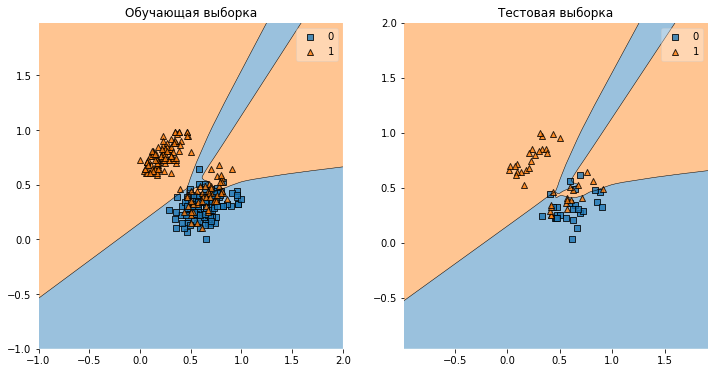

In [13]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_regions(X_train,y_train.values,model)
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_regions(X_test,y_test.values,model)

# 6

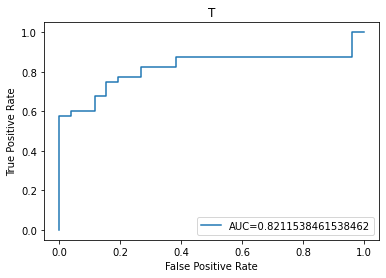

In [14]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('T')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [15]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)
    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())
    return tpr, fpr
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
    return roc.reshape(-1, 2)
plt.figure(figsize=(15,7))
ROC = roc_from_scratch(model.predict(X_test).reshape(-1),y_test)
AUC = 0.
for i in range(100):
    AUC += (ROC[i+1,0]-ROC[i,0]) * (ROC[i+1,1]+ROC[i,1])
AUC *= -0.5
AUC

0.8197115384615387

<Figure size 1080x504 with 0 Axes>

# 7

In [16]:
df.head()

,species,V0,V1,V2,V3
0,2,0.654545,0.226190,0.898305,0.638889
1,2,0.360000,0.047619,0.644068,0.402778
2,2,0.680000,0.309524,0.915254,0.694444
3,2,0.618182,0.202381,0.813559,0.680556
4,2,0.552727,0.261905,0.847458,0.708333


In [17]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(np.array(df.drop('species', axis=1)).shape[1],)) 
feature_normalizer.adapt(np.array(df.drop('species', axis=1)))
model_aux = tf.keras.Sequential([feature_normalizer,tf.keras.layers.Dense(1, activation='sigmoid')])
model_aux.compile(loss=tf.keras.losses.binary_crossentropy)
model_aux.fit(np.array(df.drop('species', axis=1)), np.array(df['species']), epochs=10, verbose=0);
model_aux.summary()
abs(model_aux.layers[1].kernel)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 4)                3         
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 8
Trainable params: 5
Non-trainable params: 3
_________________________________________________________________


<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.88844377],
       [0.76682353],
       [0.65671057],
       [0.2711699 ]], dtype=float32)>

# 8

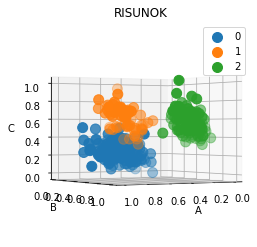

In [18]:
X=df[['V1', 'V2', 'V0']].values
y=df['species'].astype(int)
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in (np.unique(y)):
    row_ix = np.where(y == i)
    ax.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 2],s=100,label=i )
plt.title('RISUNOK')
plt.xlabel('A')
plt.ylabel('B')
ax.set_zlabel('C')
plt.legend()
ax.view_init( azim=60, elev=0 )
plt.show()

# 9

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2, seed=None)
def to_one_hot(labels, dimension=8):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)
y_train.shape, y_test.shape
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],)) 
feature_normalizer.adapt(X_train)
model = tf.keras.Sequential([feature_normalizer,
                             tf.keras.layers.Dense(32, activation="relu"),
                             tf.keras.layers.Dense(32, activation="relu"),
                             tf.keras.layers.Dense(32, activation="relu"),
                             tf.keras.layers.Dense(32, activation="relu"),
                             tf.keras.layers.Dense(32, activation="relu"),
                             tf.keras.layers.Dense(8, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    verbose=1,
                    validation_split = 0.2)

Epoch 1/200
7/7 [==============================] - 1s 38ms/step - loss: 1.9195 - accuracy: 0.6028 - val_loss: 1.6909 - val_accuracy: 0.7593
Epoch 2/200
7/7 [==============================] - 0s 4ms/step - loss: 1.5732 - accuracy: 0.7991 - val_loss: 1.3051 - val_accuracy: 0.7593
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1979 - accuracy: 0.8084 - val_loss: 0.9587 - val_accuracy: 0.7593
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 0.8806 - accuracy: 0.8084 - val_loss: 0.7037 - val_accuracy: 0.7963
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6442 - accuracy: 0.8738 - val_loss: 0.5236 - val_accuracy: 0.9259
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 0.4791 - accuracy: 0.9112 - val_loss: 0.3837 - val_accuracy: 0.9259
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.3601 - accuracy: 0.9252 - val_loss: 0.2757 - val_accuracy: 0.9259
Epoch 8/200
7/7 [=========

7/7 [==============================] - 0s 4ms/step - loss: 1.4026e-05 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 117/200
7/7 [==============================] - 0s 4ms/step - loss: 1.4306e-05 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 118/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3704e-05 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 119/200
7/7 [==============================] - 0s 6ms/step - loss: 1.5949e-05 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 120/200
7/7 [==============================] - 0s 5ms/step - loss: 3.5414e-05 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 121/200
7/7 [==============================] - 0s 6ms/step - loss: 1.5126e-04 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9815
Epoch 122/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 9.7127e-04 - val_accuracy: 1.0000

# 10

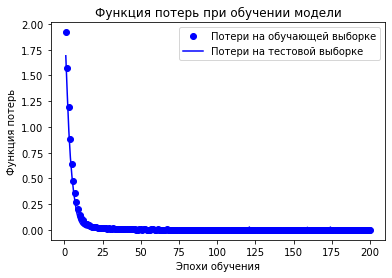

In [20]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Потери на обучающей выборке")
plt.plot(epochs, val_loss, "b", label="Потери на тестовой выборке")
plt.title("Функция потерь при обучении модели")
plt.xlabel("Эпохи обучения")
plt.ylabel("Функция потерь")
plt.legend();